In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from scipy.stats import stats
# import itertools

/home/nimmitha/miniconda3/envs/work/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
files = sorted(glob('../results/????.csv'))

In [3]:
print("Fount files")
for file in files:
    print(file)

Fount files
../results/8730.csv
../results/8739.csv
../results/8741.csv
../results/9050.csv
../results/9057.csv
../results/9063.csv
../results/9070.csv
../results/9072.csv


In [4]:
dfs = [pd.read_csv(f, index_col=None) for f in files]
df = pd.concat(dfs, axis=0, join='inner', ignore_index=True)
df = df.sort_values('mean_sbil')

In [5]:
df = df[df.ntracks_time > 30000]
# plt.plot(df.ntracks_time, '.')

# drop fills in the list
df = df.drop(df[df.fill.isin([9056])].index)

In [6]:
# fills = sorted(list(set(df['fill'].values)))

# for fill in fills:
#     plt.plot(df[df['fill']==fill].t1, df[df['fill']==fill]['mean_sbil'], '.')
#     # plt.scatter(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['ntracks_time'], s=markers)

# figure = plt.gcf()
# figure.set_size_inches(16,10)
# plt.legend(fills, loc=2, fontsize=legend_font)
# plt.grid()
# # plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
# # plt.ylabel("Number of tracks found", fontsize=label_font)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)

# # plt.savefig('ntracks_vs_SBIL.png', dpi=600)

In [7]:
markers = 30
legend_font = 15
label_font = 20

In [8]:
fills = sorted(list(set(df['fill'].values)))

nonlin = dict.fromkeys(fills, -99)
nonlin[8691] = 1.25
nonlin[8730] = 0.9
nonlin[8739] = -0.2
nonlin[8741] = -1.2
nonlin[9050] = 0.3
nonlin[9057] = 0.4
nonlin[9063] = 0.7
nonlin[9070] = 0.6
nonlin[9072] = 0.5
# nonlin = {8691: 1.25, 8730: 0.9, 8739: -0.2, 8741: -1.2}

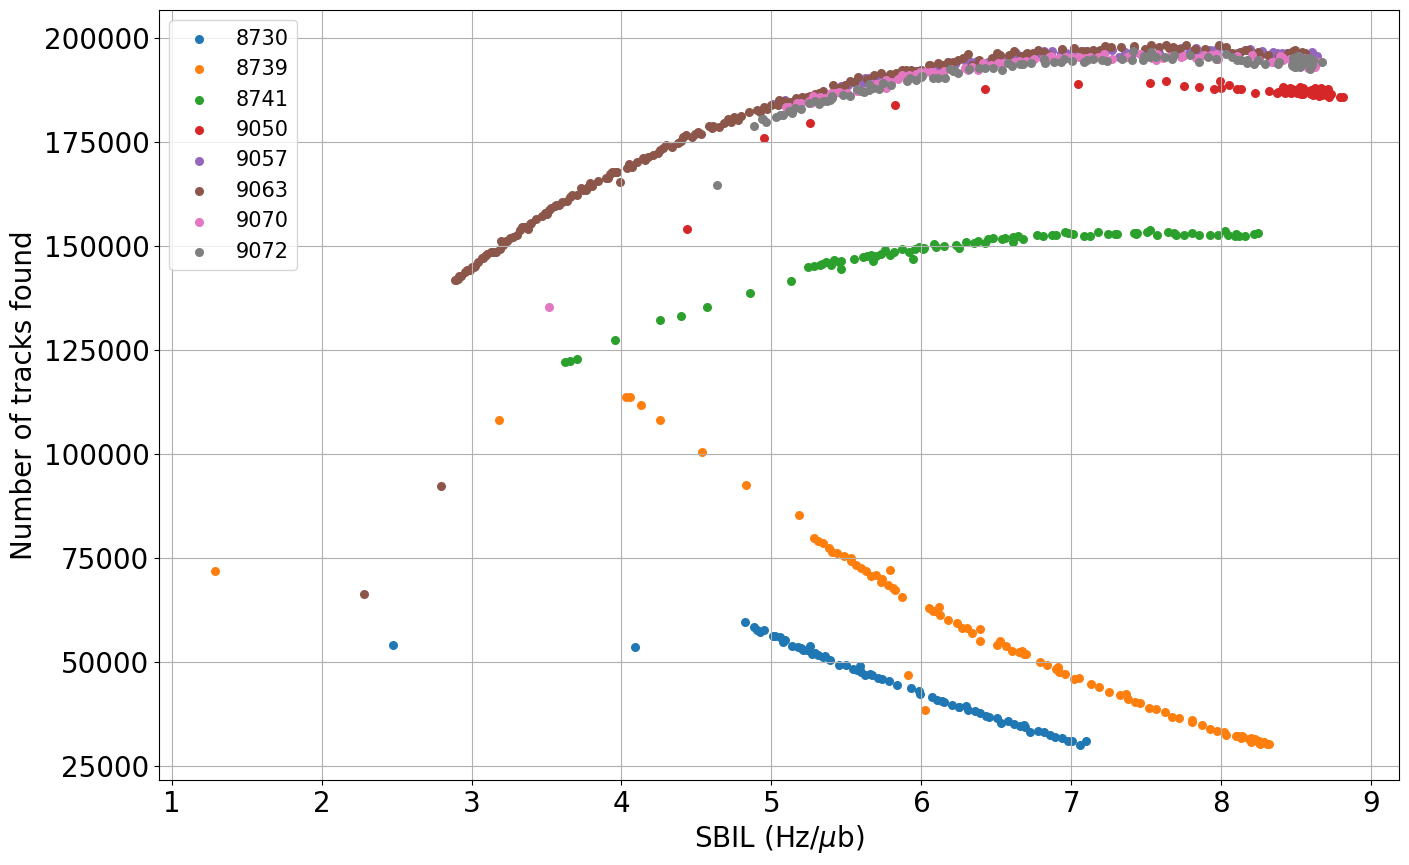

In [9]:
for fill in fills:
    plt.scatter(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['ntracks_time'], s=markers, label=fill)

figure = plt.gcf()
figure.set_size_inches(16,10)
# plt.legend(fill_legend, loc=2, fontsize=legend_font)
plt.legend(loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Number of tracks found", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('ntracks_vs_SBIL.png', dpi=600)

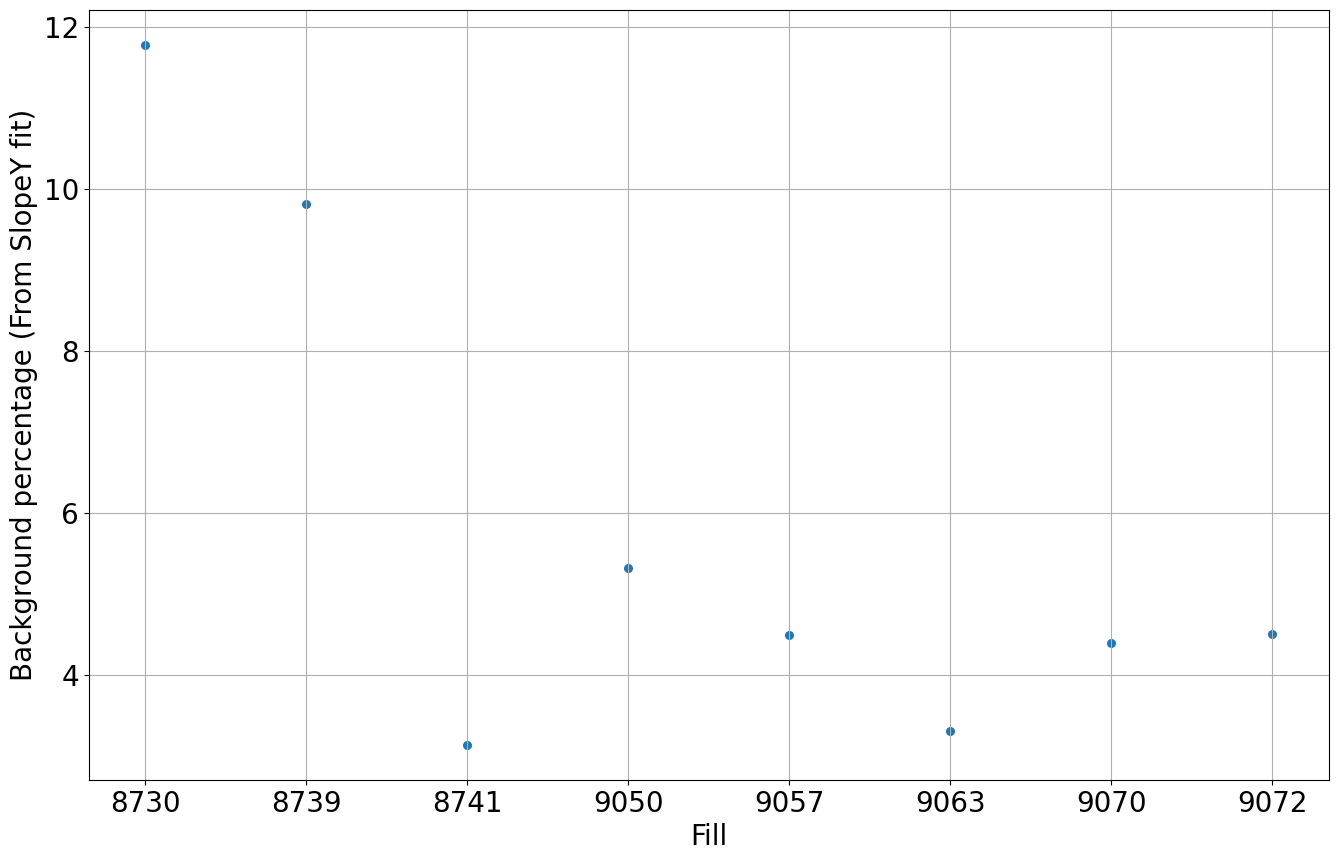

In [10]:
fills = sorted(list(set(df['fill'].values)))
mean_f = []

for fill in fills:
    mean_f.append(df[df['fill']==fill]['fSlopeY(%)'].mean())

fills = [str(x) for x in fills]
plt.scatter(fills, mean_f, s=markers)
    #plt.plot(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fSlopeY(%)'], '-')

figure = plt.gcf()
figure.set_size_inches(16,10)
plt.grid()
plt.xlabel("Fill", fontsize=label_font)
plt.ylabel("Background percentage (From SlopeY fit)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('f_vs_fill.png', dpi=600)

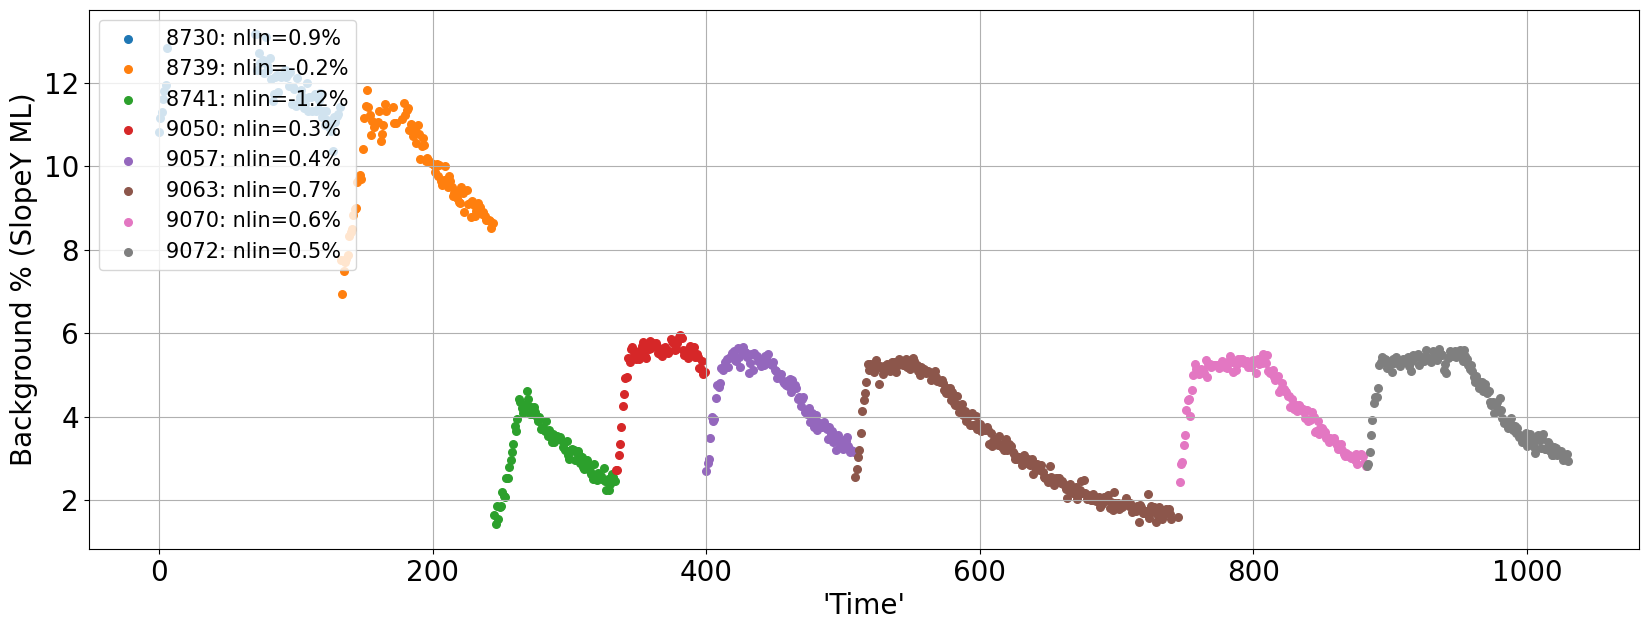

In [11]:
fills = sorted(list(set(df['fill'].values)))

ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(20,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    # x = df[df['fill']==fill]['mean_sbil']
    x = df[df['fill']==fill].index
    y = df[df['fill']==fill]['fSlopeY(%)']
    yerr = df[df['fill']==fill]['fSlopeY_e(%)']
    plt.scatter(x, y, s=30, label=f"{fill}: nlin={nonlin[fill]}%")
    # plt.errorbar(x, y, yerr=yerr, fmt='.', color=color)
    # gradient, intercept, r_val, p_val, std_err = stats.linregress(x, y)
    # plt.plot(x, gradient * x + intercept, color=color, label=f"{fill}: nlin={nonlin[fill]}% y={gradient:0.2f}x{intercept:+.2f}")
    
plt.legend(loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("'Time'", fontsize=label_font)
plt.ylabel("Background % (SlopeY ML)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim([0, 9.5])

plt.savefig('fSlopeY_vs_Time.png', dpi=600)

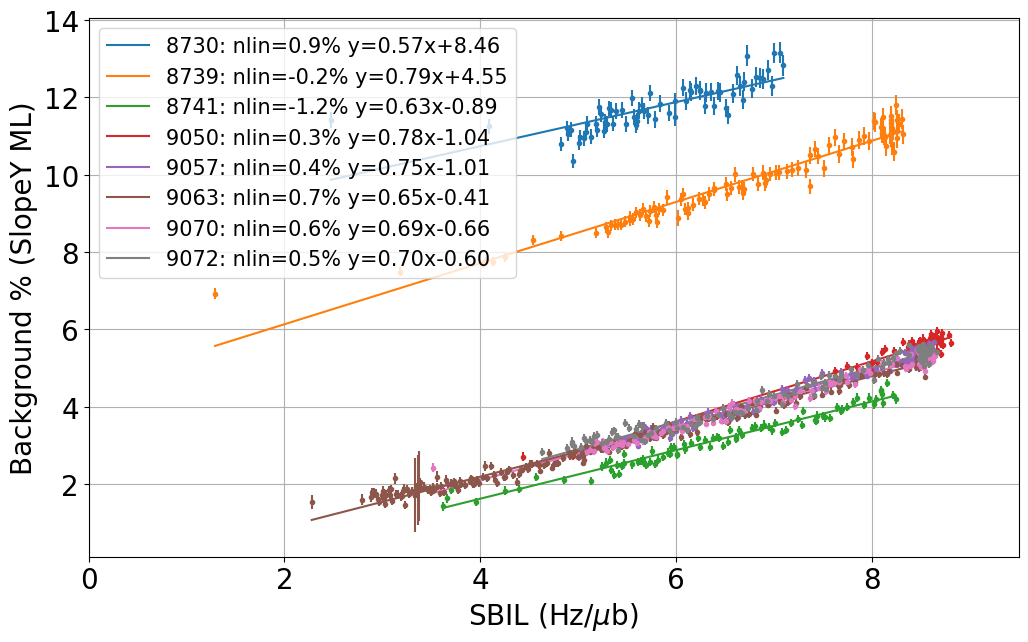

In [12]:
fills = sorted(list(set(df['fill'].values)))

ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    x = df[df['fill']==fill]['mean_sbil']
    y = df[df['fill']==fill]['fSlopeY(%)']
    yerr = df[df['fill']==fill]['fSlopeY_e(%)']
    plt.errorbar(x, y, yerr=yerr, fmt='.', color=color)
    gradient, intercept, r_val, p_val, std_err = stats.linregress(x, y)
    plt.plot(x, gradient * x + intercept, color=color, label=f"{fill}: nlin={nonlin[fill]}% y={gradient:0.2f}x{intercept:+.2f}")
    
plt.legend(loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Background % (SlopeY ML)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 9.5])
# plt.xlim([0, 0.2])
# plt.ylim([-1, 7])


plt.savefig('fSlopeY_vs_SBIL.png', dpi=600)

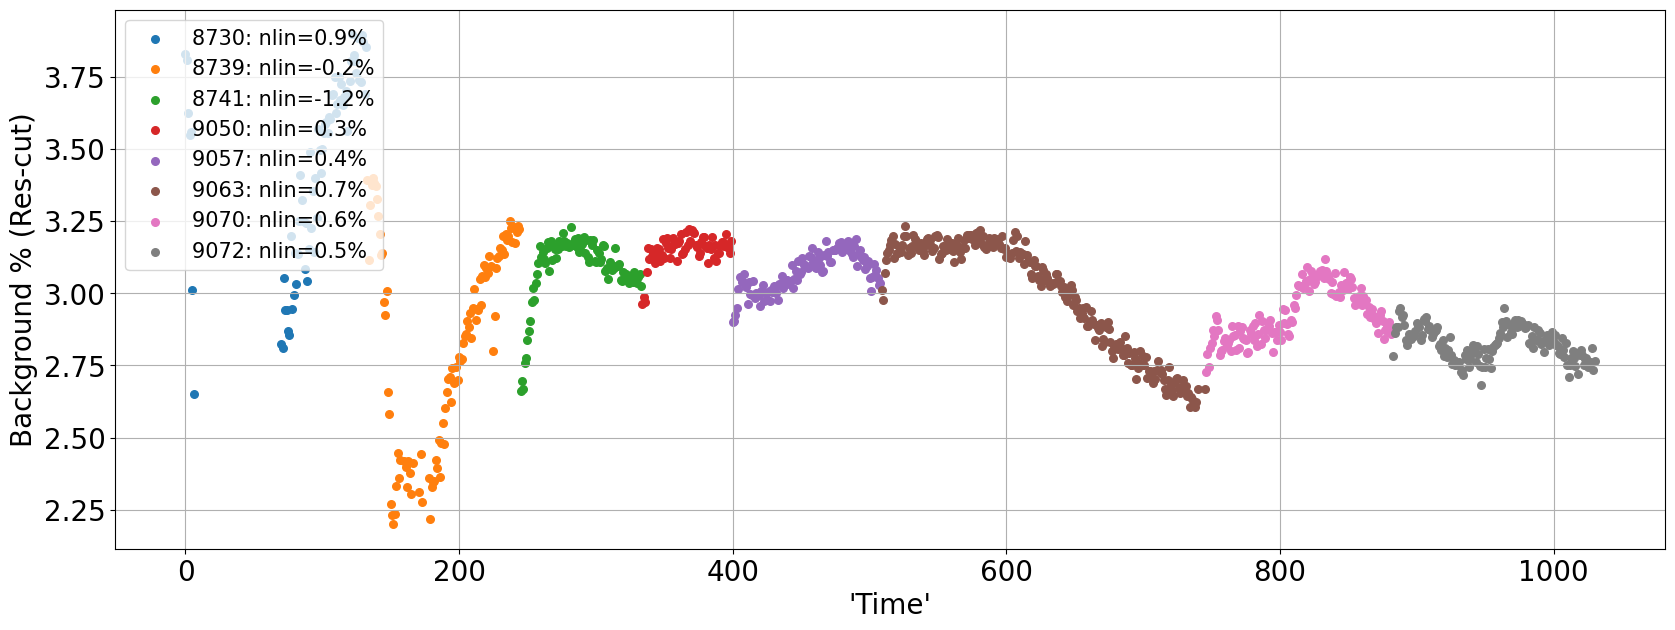

In [13]:
fills = sorted(list(set(df['fill'].values)))

ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(20,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    # x = df[df['fill']==fill]['mean_sbil']
    x = df[df['fill']==fill].index
    y = df[df['fill']==fill]['fR(%)']
    yerr=df[df['fill']==fill]['fR_e(%)']
    plt.scatter(x, y, s=30, label=f"{fill}: nlin={nonlin[fill]}%")
    # plt.errorbar(x, y, yerr=yerr, fmt='.', color=color)
    # gradient, intercept, r_val, p_val, std_err = stats.linregress(x, y)
    # plt.plot(x, gradient * x + intercept, color=color, label=f"{fill}: nlin={nonlin[fill]}% y={gradient:0.2f}x{intercept:+.2f}")
    
plt.legend(loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("'Time'", fontsize=label_font)
plt.ylabel("Background % (Res-cut)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlim([0, 9.5])

plt.savefig('fR_vs_Time.png', dpi=600)

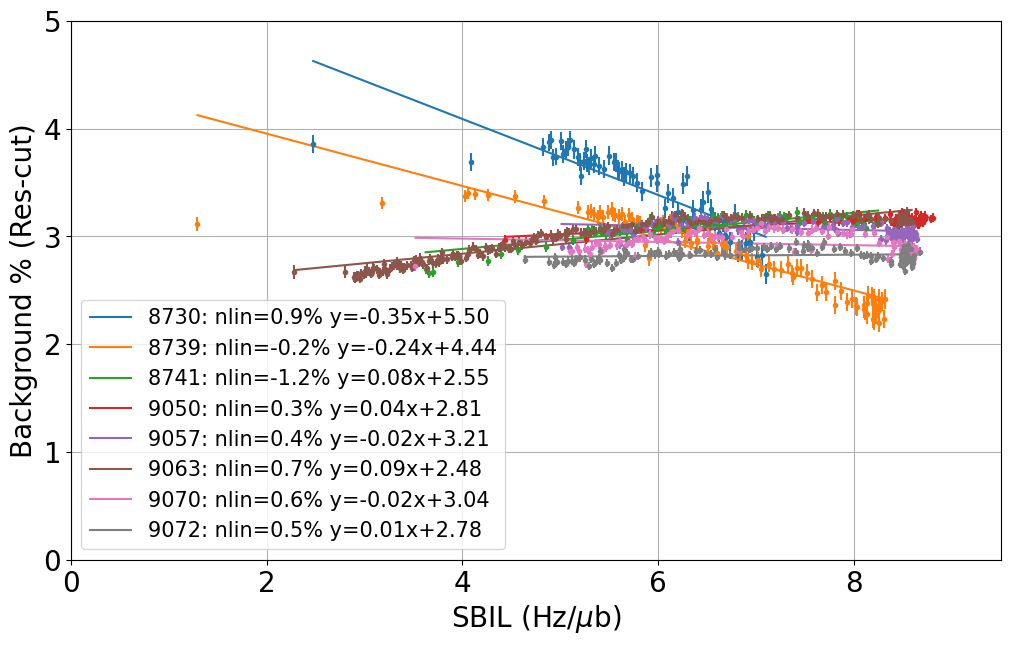

In [14]:
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    x = df[df['fill']==fill]['mean_sbil']
    y = df[df['fill']==fill]['fR(%)']
    yerr=df[df['fill']==fill]['fR_e(%)']

    plt.errorbar(x, y, yerr=yerr, fmt='.', color=color)
    gradient, intercept, r_val, p_val, std_err = stats.linregress(x, y)
    plt.plot(x, gradient * x + intercept, color=color, label=f"{fill}: nlin={nonlin[fill]}% y={gradient:0.2f}x{intercept:+0.2f}")

plt.legend(loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Background % (Res-cut)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 9.5])
# plt.xlim([0, 0.5])
plt.ylim([0, 5])

plt.savefig('fR_vs_SBIL.png', dpi=600)

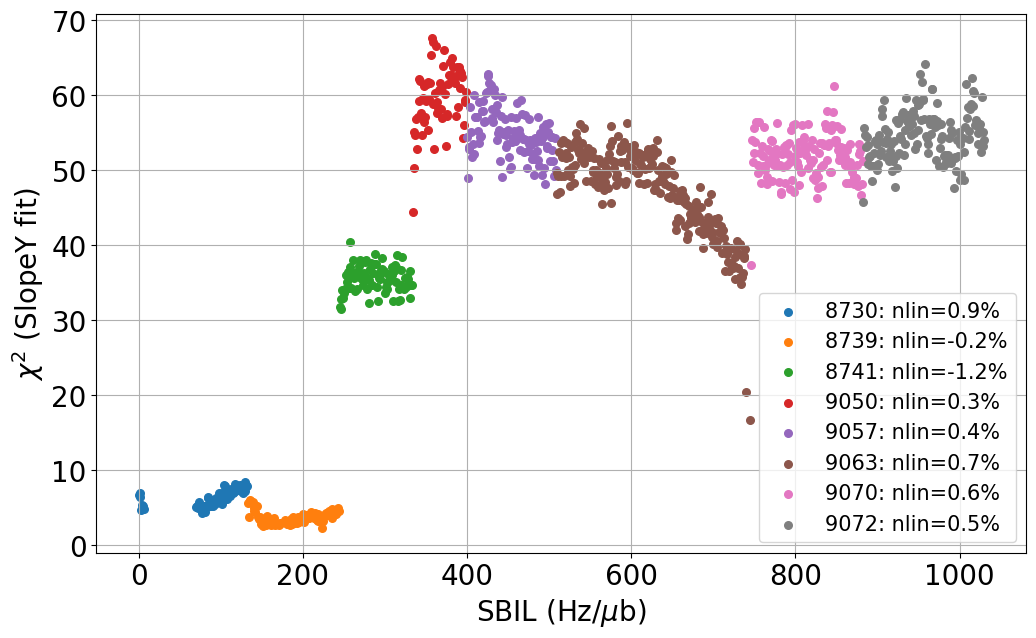

In [15]:
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    x = df[df['fill']==fill].index
    # x = df[df['fill']==fill]['mean_sbil']
    y = df[df['fill']==fill]['chi2']

    plt.scatter(x, y, s=30, label=f"{fill}: nlin={nonlin[fill]}%")

plt.legend(loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("$\chi^{2}$ (SlopeY fit)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.xlim([-0.1, 0.2])

plt.savefig('chi2_vs_Time.png', dpi=600)

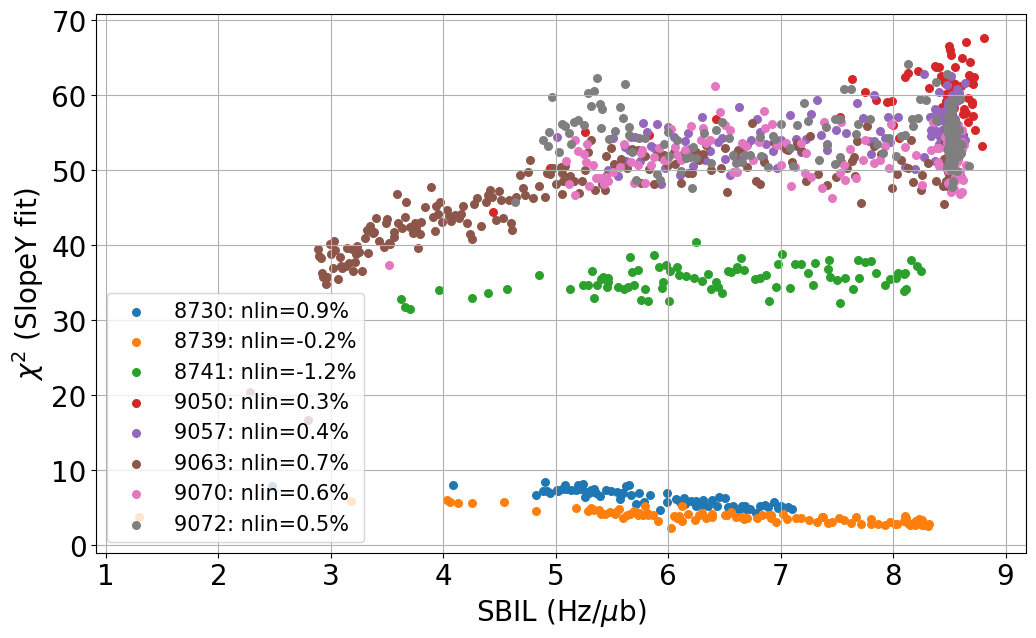

In [16]:
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    x = df[df['fill']==fill]['mean_sbil']
    y = df[df['fill']==fill]['chi2']

    plt.scatter(x, y, s=30, label=f"{fill}: nlin={nonlin[fill]}%")

plt.legend(loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("$\chi^{2}$ (SlopeY fit)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.xlim([-0.1, 0.2])

plt.savefig('chi2_vs_SBIL.png', dpi=600)

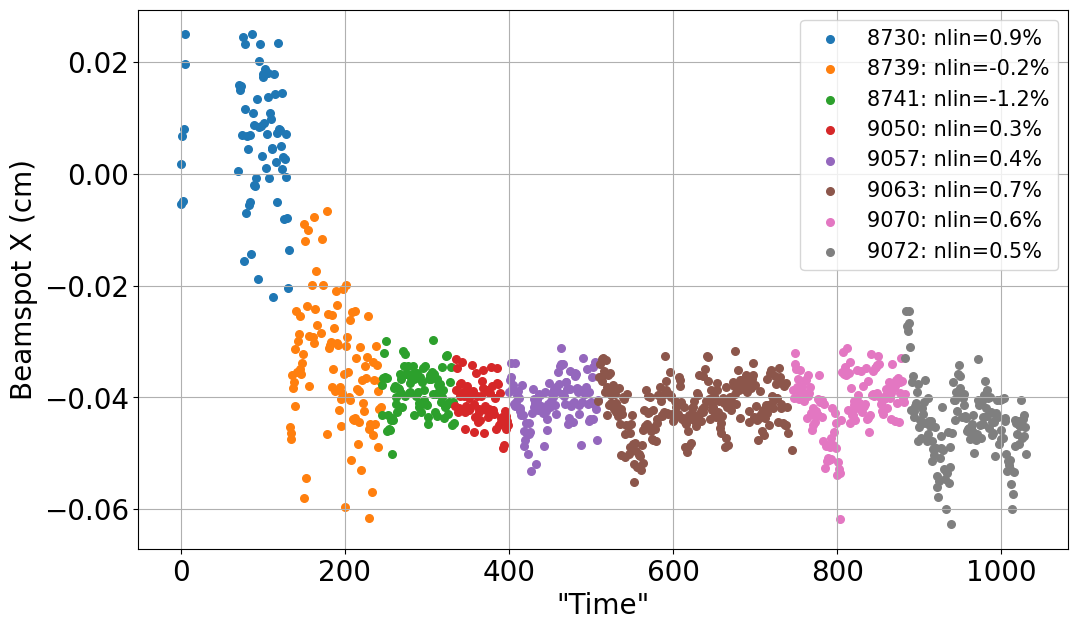

In [17]:
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    # x = df[df['fill']==fill]['mean_sbil']
    x = df[df['fill']==fill].index
    y = df[df['fill']==fill]['BSZ_x']
    plt.scatter(x, y, s=30, label=f"{fill}: nlin={nonlin[fill]}%")

plt.legend(loc=0, fontsize=legend_font)
plt.grid()
# plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.xlabel("\"Time\"", fontsize=label_font)
plt.ylabel("Beamspot X (cm)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('BeamspotZ_x_vs_Time.png', dpi=600)

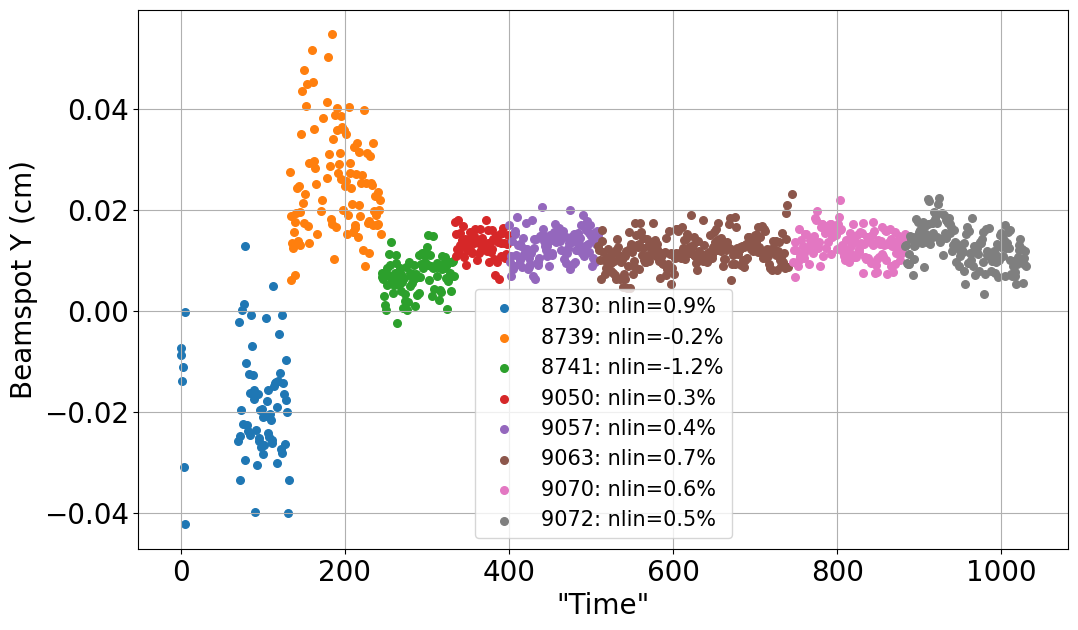

In [18]:
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,7)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    # x = df[df['fill']==fill]['mean_sbil']
    x = df[df['fill']==fill].index
    y =  df[df['fill']==fill]['BSZ_y']
    plt.scatter(x, y, s=30, label=f"{fill}: nlin={nonlin[fill]}%")

plt.legend(loc=0, fontsize=legend_font)
plt.grid()
# plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.xlabel("\"Time\"", fontsize=label_font)
plt.ylabel("Beamspot Y (cm)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig('BeamspotZ_y_vs_SBIL.png', dpi=600)
plt.savefig('BeamspotZ_y_vs_Time.png', dpi=600)

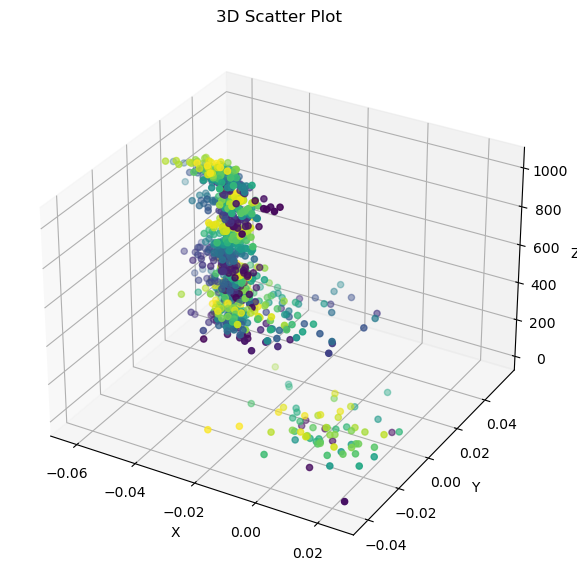

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Create the figure and 3D axes
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

for fill in fills:
    # fill = 8730
    x = df[df['fill']==fill]['BSZ_x']
    y = df[df['fill']==fill]['BSZ_y']
    z = df[df['fill']==fill].index
    ax.scatter3D(x, y, z, c=z, cmap='viridis')  
    # break

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')
plt.show()

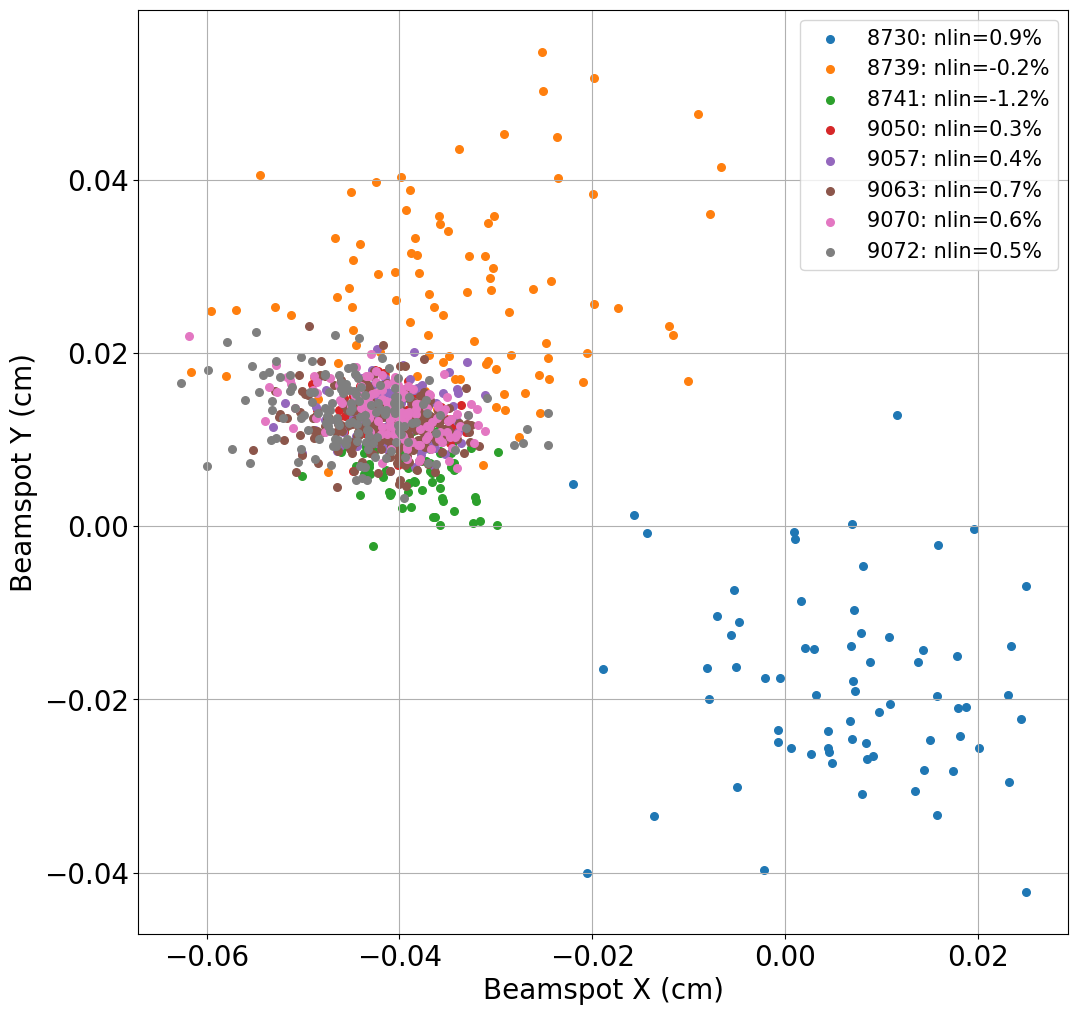

In [20]:
ax = plt.gca()
figure = plt.gcf()
figure.set_size_inches(12,12)
for fill in fills:
    color = next(ax._get_lines.prop_cycler)['color']
    x = df[df['fill']==fill]['BSZ_x']
    y = df[df['fill']==fill]['BSZ_y']
    plt.scatter(x, y, s=30, label=f"{fill}: nlin={nonlin[fill]}%")

plt.legend(loc=0, fontsize=legend_font)
plt.grid()
plt.xlabel("Beamspot X (cm)", fontsize=label_font)
plt.ylabel("Beamspot Y (cm)", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# circle1 = plt.Circle((0.006, -0.004), 0.03, fill=False)
# ax = figure.gca()
# ax.add_patch(circle1)

plt.savefig('Beamspot.png', dpi=600)

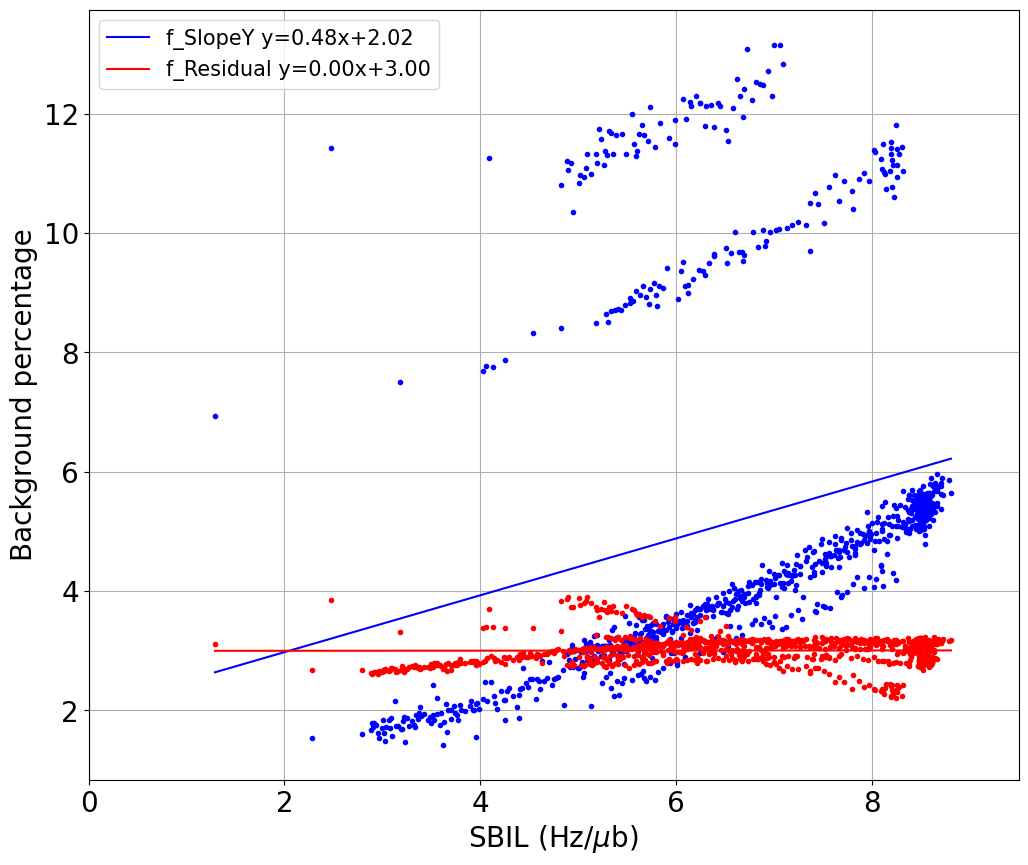

In [21]:
figure = plt.gcf()
figure.set_size_inches(12,10)
x = df['mean_sbil']
y_fS = df['fSlopeY(%)']
y_fR = df['fR(%)']

plt.plot(x, y_fS, '.b')
gradient, intercept, r_val, p_val, std_err = stats.linregress(x, y_fS)
plt.plot(x, gradient * x + intercept, 'b', label=f"f_SlopeY y={gradient:.2f}x{intercept:+.2f}")

plt.plot(x, y_fR, '.r')
gradient, intercept, r_val, p_val, std_err = stats.linregress(x, y_fR)
plt.plot(x, gradient * x + intercept, 'r', label=f"f_Residual y={gradient:.2f}x{intercept:+.2f}")

plt.legend(loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("Background percentage", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 9.5])
# plt.xlim([0, 0.2])
# plt.ylim([-1, 7])

plt.savefig('fR_and_fS_vs_SBIL.png', dpi=600)

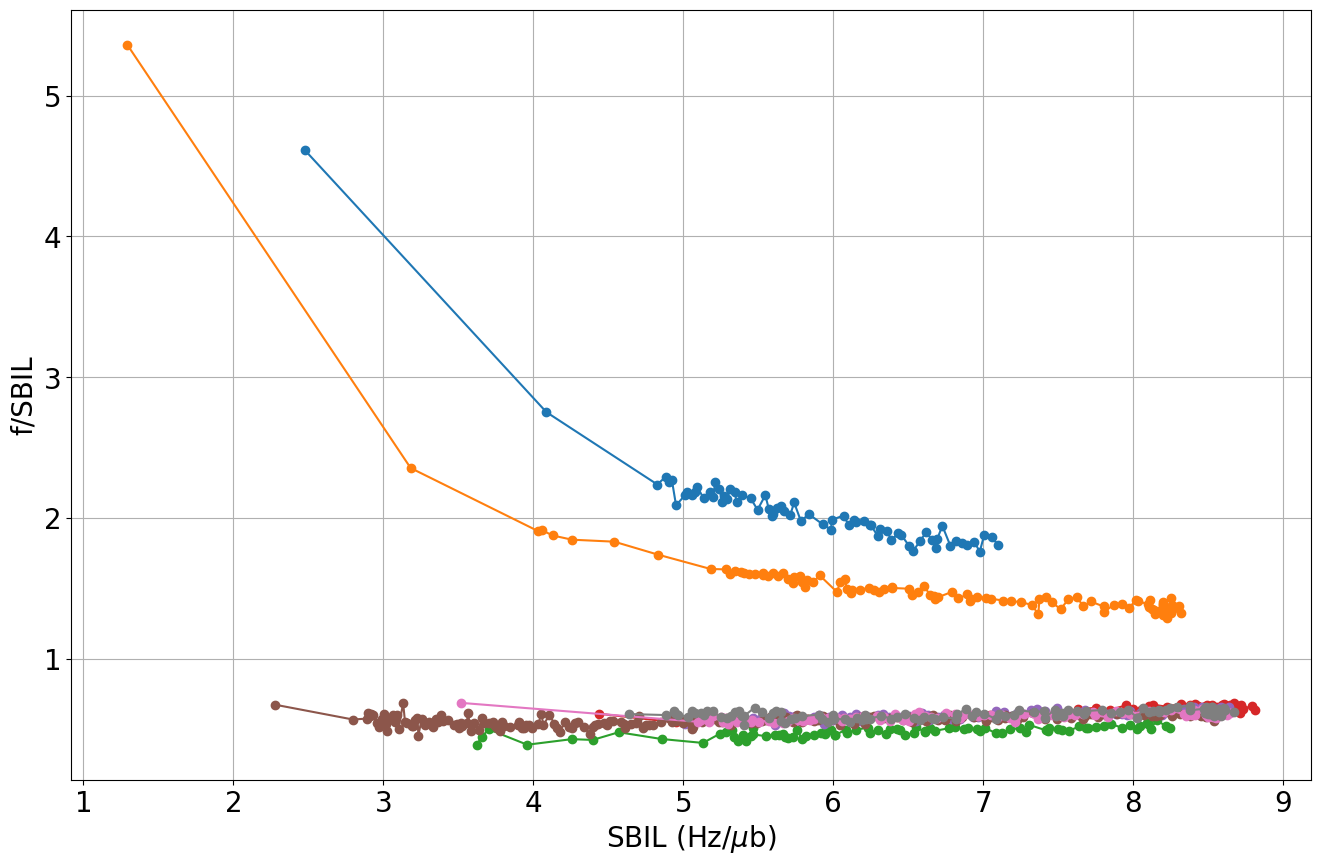

In [22]:
for fill in fills:
    plt.plot(df[df['fill']==fill]['mean_sbil'], df[df['fill']==fill]['fSlopeY(%)']/df[df['fill']==fill]['mean_sbil'], '-o')
    

figure = plt.gcf()
figure.set_size_inches(16, 10)
# plt.legend(fill_legend, loc=0, fontsize=legend_font)
#plt.legend(["f_SlopeY","f_Residual"], loc=2, fontsize=legend_font)
plt.grid()
plt.xlabel("SBIL (Hz/$\mu$b)", fontsize=label_font)
plt.ylabel("f/SBIL", fontsize=label_font)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim([0,1])

plt.savefig('rate_vs_SBIL.png', dpi=600)

In [23]:
df.columns

Index(['fill', 't1', 't2', 'mean_lumi', 'mean_sbil', 'channel', 'ntracks_time',
       'ntracks_resi', 'bkg_frac', 'bkg_frac_e', 'bkg_m0', 'bkg_m0_e',
       'bkg_s0', 'bkg_s0_e', 'BSZ_x', 'BSZ_x_std', 'BSZ_y', 'BSZ_y_std',
       'chi2', 'fSlopeY(%)', 'fSlopeY_e(%)', 'fR(%)', 'fR_e(%)'],
      dtype='object')

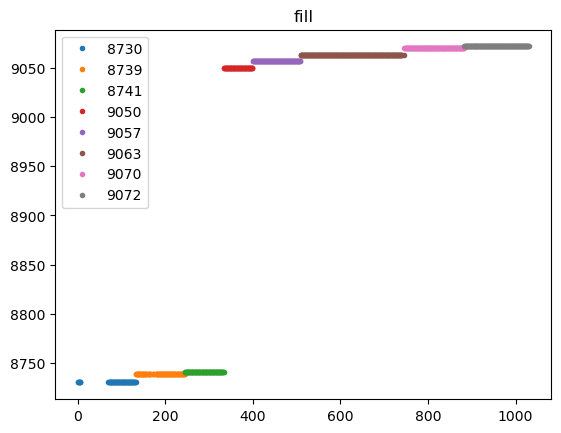

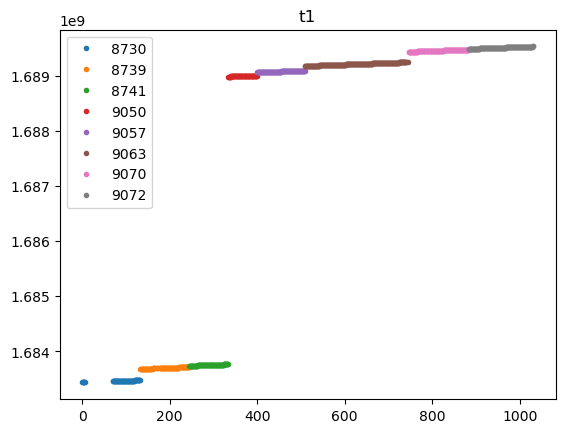

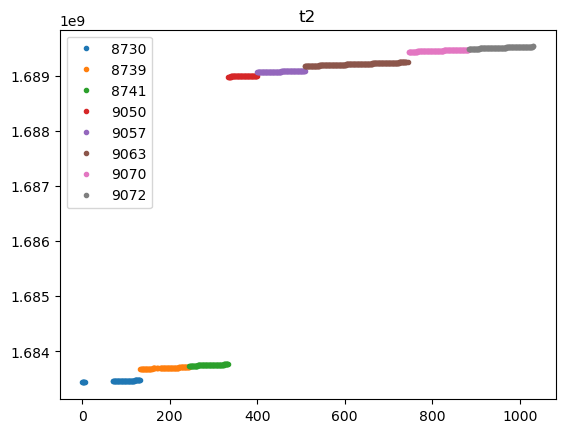

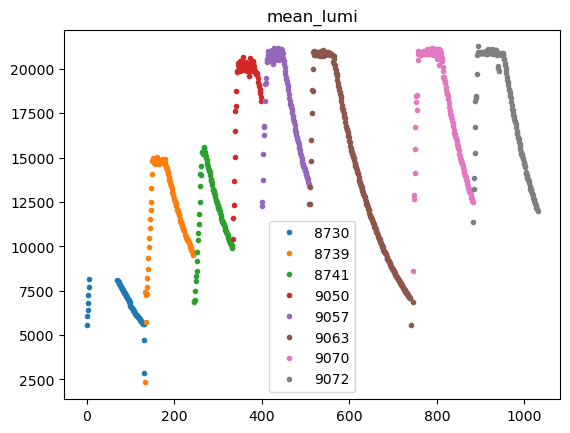

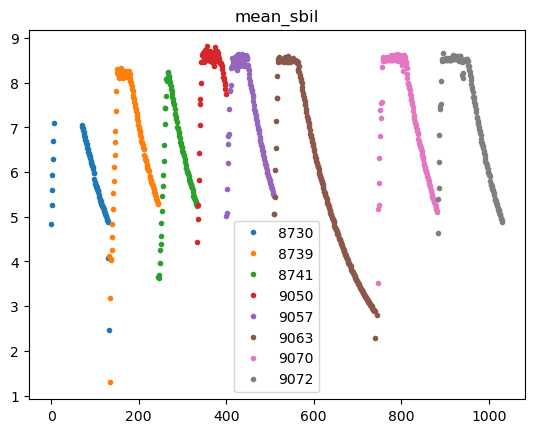

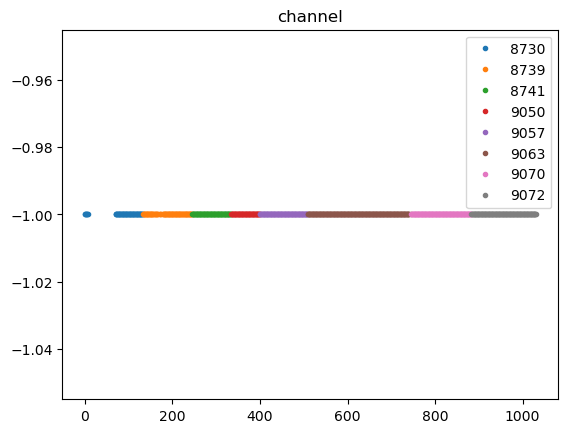

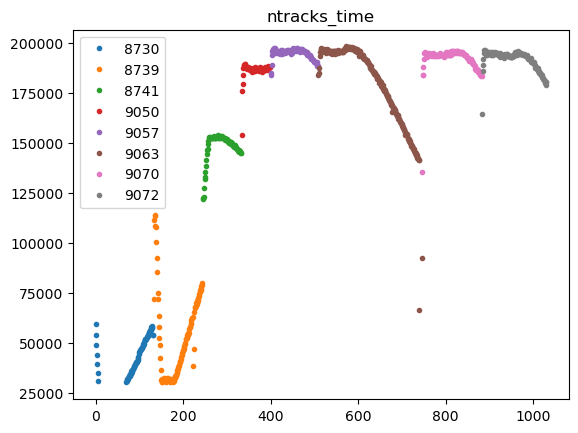

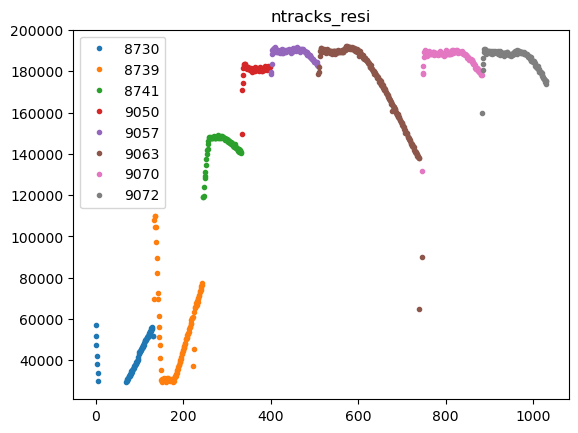

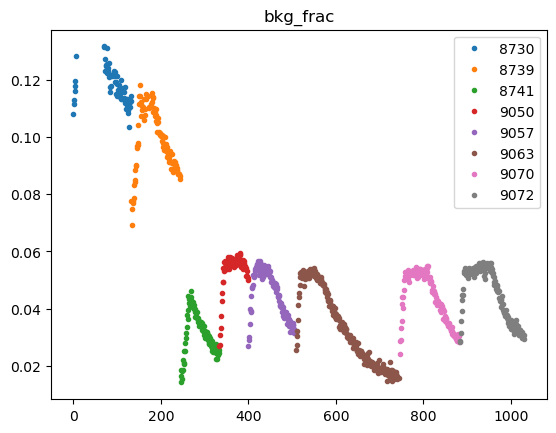

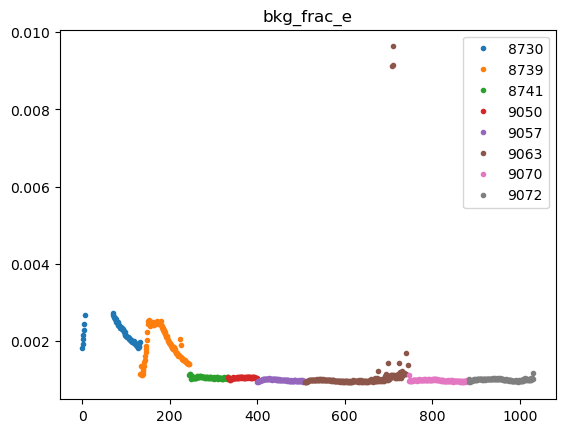

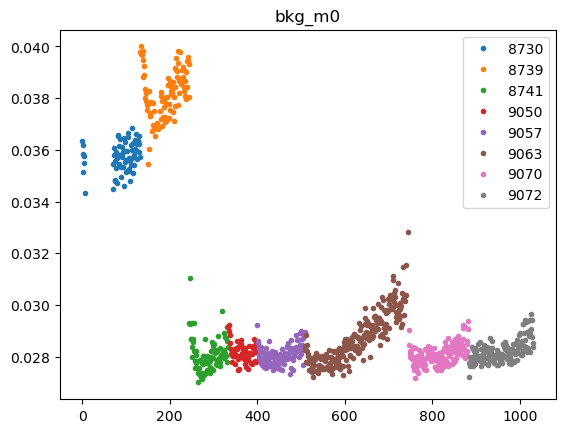

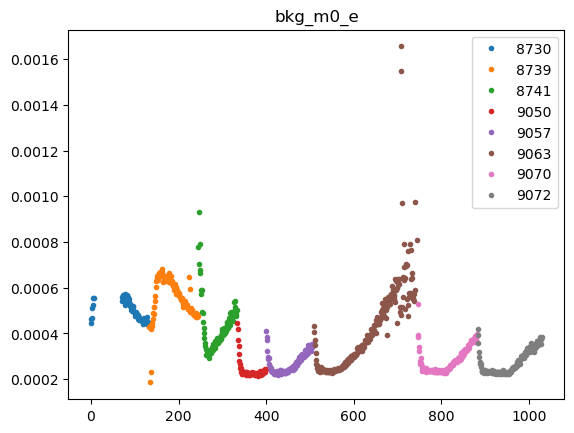

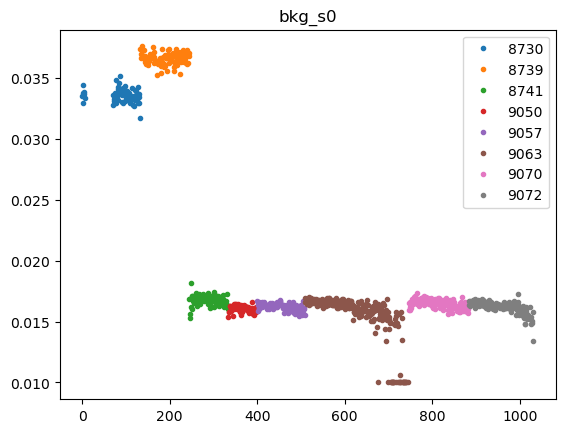

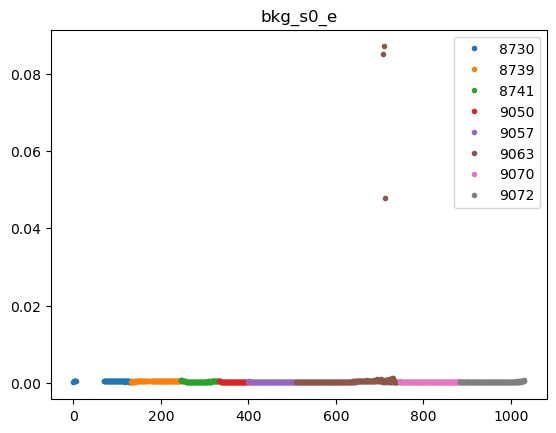

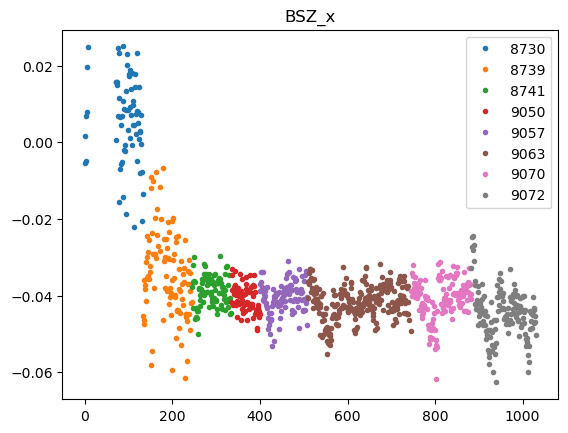

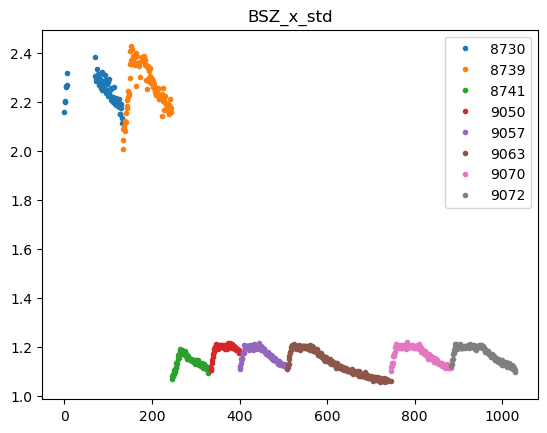

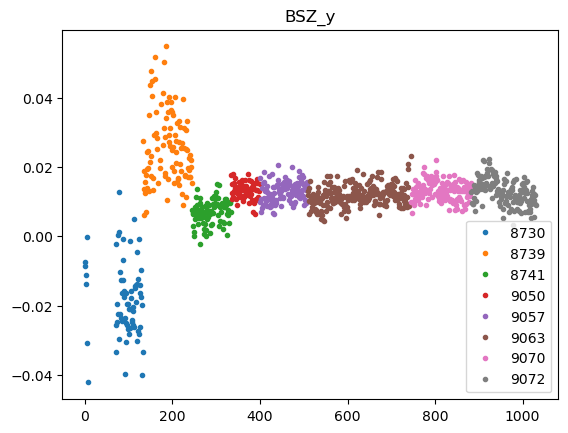

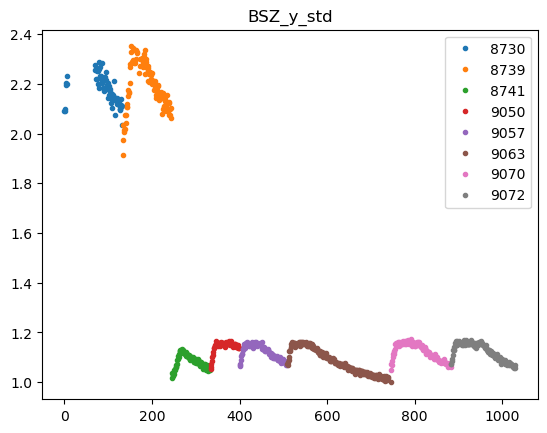

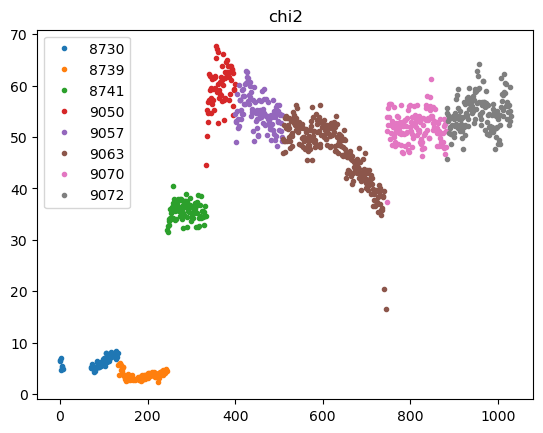

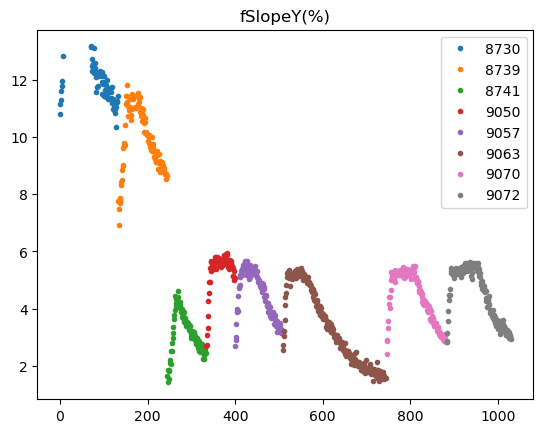

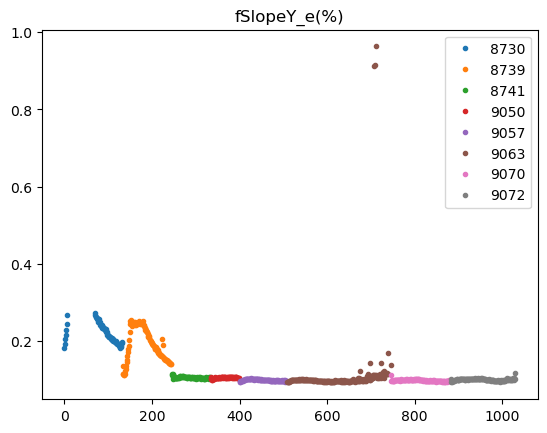

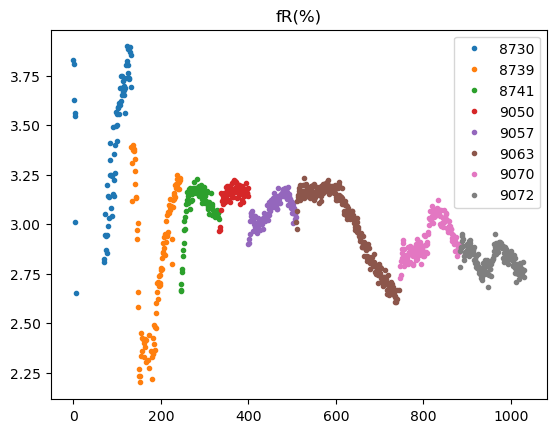

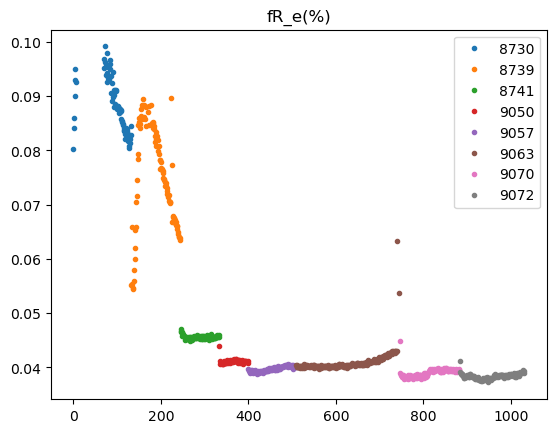

In [24]:
for col in df.columns:
    plt.figure()
    for fill in fills:
        x = df[df['fill']==fill].index
        y = df[df['fill']==fill][col]
        plt.plot(x, y, '.', label=f'{fill}')
    plt.legend()
    plt.title(f"{col}")
    plt.show()
    plt.close()

In [31]:
df[df.fill==8739]

,fill,t1,t2,mean_lumi,mean_sbil,channel,ntracks_time,ntracks_resi,bkg_frac,bkg_frac_e,...,bkg_s0_e,BSZ_x,BSZ_x_std,BSZ_y,BSZ_y_std,chi2,fSlopeY(%),fSlopeY_e(%),fR(%),fR_e(%)
134,8739,1683683100,1683683399,2331.983272,1.291957,-1,52886,51561,0.009331,0.001633,...,0.001343,0.002969,1.071300,0.021684,0.998594,5.027750,0.933109,0.163300,2.505389,0.068828
135,8739,1683683400,1683683699,5743.354339,3.181914,-1,106127,103304,0.011363,0.001090,...,0.000799,0.000187,1.092996,0.022489,1.024021,10.201608,1.136283,0.108995,2.660021,0.050064
136,8739,1683683700,1683683999,7272.278728,4.028963,-1,135751,132064,0.010666,0.000955,...,0.000835,0.003731,1.098166,0.020500,1.024782,11.209119,1.066629,0.095540,2.716002,0.044729
137,8739,1683684000,1683684299,7321.529357,4.056249,-1,136207,132596,0.013065,0.001027,...,0.000964,0.005493,1.096410,0.023261,1.038947,10.451261,1.306520,0.102740,2.651112,0.044118
133,8739,1683682800,1683683099,7453.460561,4.129341,-1,138334,134607,0.010907,0.000937,...,0.000749,0.007089,1.086095,0.023162,1.029440,10.271112,1.090705,0.093730,2.694204,0.044132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,8739,1683690600,1683690899,15102.631014,8.367109,-1,169089,163415,0.033503,0.000973,...,0.000268,0.001474,1.182196,0.016388,1.120509,12.422418,3.350284,0.097281,3.355629,0.044548
167,8739,1683693000,1683693299,15104.288296,8.368027,-1,169925,164235,0.034305,0.000969,...,0.000262,0.006185,1.192110,0.017534,1.134899,11.528856,3.430518,0.096924,3.348536,0.044391
168,8739,1683693300,1683693599,15104.568128,8.368182,-1,168403,162764,0.034286,0.000958,...,0.000265,0.000965,1.196036,0.017740,1.142454,12.717324,3.428601,0.095796,3.348515,0.044591
174,8739,1683695100,1683695399,15105.012328,8.368428,-1,168779,163154,0.034176,0.000974,...,0.000268,0.003825,1.180577,0.013791,1.131997,12.226163,3.417626,0.097390,3.332761,0.044437
